In [169]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import scipy.odr.odrpack as odrpack
from IPython.display import clear_output

In [163]:
import random
import numpy as np
import scipy.stats as st

class CovertDecisionModel:
    
    def __init__(self):
        pass
        
    def convert_k_to_p(self, d_prime, k1, k2):
        
        a_given_a = st.norm.cdf(k1 + d_prime/2)
        b_given_a = 1 - st.norm.cdf(k2 + d_prime/2)
        a_given_b = st.norm.cdf(k1 - d_prime/2)
        b_given_b = 1 - st.norm.cdf(k2 - d_prime/2)
        
        p_aa = a_given_a*b_given_a + b_given_a*a_given_a
        p_ab = a_given_a*b_given_b + b_given_a*a_given_b
        p_ba = a_given_b*b_given_a + b_given_b*a_given_a
        p_bb = a_given_b*b_given_b + b_given_b*a_given_b
        
        p_false = p_aa + p_bb
        p_hit = p_ab + p_ba
        
        return p_false, p_hit
        
    def convert_k_to_z(self, d_prime, k1, k2):
        
        p_false, p_hit = self.convert_k_to_p(d_prime, k1, k2)
        return st.norm.ppf(p_false), st.norm.ppf(p_hit)
        
    def sample_k1_k2_values_to_z(self, k_range, d_prime, num_points):
        
        #CC2a
        zf_vals = []
        zh_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for _ in range(num_points):
            k1 = random.choice(k_range)
            
            k2_range = [n for n in k_range if n >= k1]
            k2 = random.choice(k2_range)
            
            z_f, z_h = self.convert_k_to_z(d_prime, k1, k2)
            
            zf_vals.append(z_f)
            zh_vals.append(z_h)
            
        return zf_vals, zh_vals
    
    def sample_k1_k2_values_to_p(self, k_range, d_prime, num_points):
        
        # CC2a
        pf_vals = []
        ph_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for _ in range(num_points):
            k1 = random.choice(k_range)
            
            k2_range = [n for n in k_range if n >= k1]
            k2 = random.choice(k2_range)
            
            p_f, p_h = self.convert_k_to_p(d_prime, k1, k2)
            
            pf_vals.append(p_f)
            ph_vals.append(p_h)
            
        return pf_vals, ph_vals
    
    def sample_k_values_to_z(self, k_range, d_prime, num_points):
        
        # CC2s
        zf_vals = []
        zh_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for _ in range(num_points):
            k = random.choice(k_range)
            z_f, z_h = self.convert_k_to_z(d_prime, -k, k)
            
            zf_vals.append(z_f)
            zh_vals.append(z_h)
            
        return zf_vals, zh_vals
    
    def sample_k_values_to_p(self, k_range, d_prime, num_points):
        
        # CC2s
        pf_vals = []
        ph_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for _ in range(num_points):
            k = random.choice(k_range)
            p_f, p_h = self.convert_k_to_p(d_prime, -k, k)
            
            pf_vals.append(p_f)
            ph_vals.append(p_h)
            
        return pf_vals, ph_vals
    
    def convert_k_to_p_cc1(self, d_prime, k):
        
        p_false = (st.norm.cdf(k+d_prime/2)*(1 - st.norm.cdf(k+d_prime/2)) + st.norm.cdf(k-d_prime/2)*(1-st.norm.cdf(k-d_prime/2)))
        p_hit = (st.norm.cdf(k+d_prime/2)*(1 - st.norm.cdf(k-d_prime/2)) + st.norm.cdf(k-d_prime/2)*(1-st.norm.cdf(k+d_prime/2)))
        
        return p_false, p_hit
        
    def convert_k_to_z_cc1(self, d_prime, k):
        
        p_false, p_hit = self.convert_k_to_p_cc1(d_prime, k)
        return st.norm.ppf(p_false), st.norm.ppf(p_hit)
    
    def get_k_values_to_z_cc1(self, k_range, d_prime):
        
        # CC1
        zf_vals = []
        zh_vals = []
        
        for k in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num']):
            z_f, z_h = self.convert_k_to_z_cc1(d_prime, k)
            
            zf_vals.append(z_f)
            zh_vals.append(z_h)
            
        return zf_vals, zh_vals
    
    def get_k_values_to_p_cc1(self, k_range, d_prime):
        
        # CC1
        pf_vals = []
        ph_vals = []
        
        for k in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num']):
            p_f, p_h = self.convert_k_to_p_cc1(d_prime, k)
            
            pf_vals.append(p_f)
            ph_vals.append(p_h)
            
        return pf_vals, ph_vals
    
diff_model = CovertDecisionModel()

Text(0.5, 1.0, "d'=1")

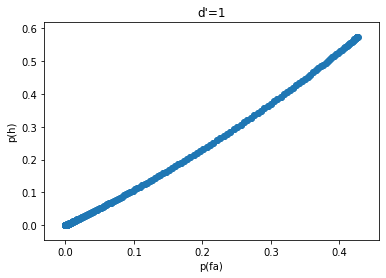

In [167]:
k_range = {'k_min': -10, 'k_max': 10, 'k_num': 1001}
zfs, zhs = diff_model.get_k_values_to_p_cc1(k_range, 1)
plt.scatter(zfs, zhs)
#plt.plot([0, 0.4], [0, 0.4])
plt.xlabel('p(fa)')
plt.ylabel('p(h)')
plt.title('d\'=1')


Text(0, 0.5, 'z(h)')

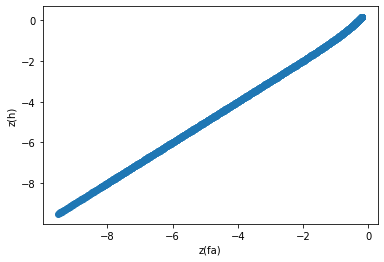

In [168]:
k_range = {'k_min': -10, 'k_max': 10, 'k_num': 1001}
zfs, zhs = diff_model.get_k_values_to_z_cc1(k_range, 1)
plt.scatter(zfs, zhs)
#plt.plot([0, 0.4], [0, 0.4])
plt.xlabel('z(fa)')
plt.ylabel('z(h)')


# CC2 k-Value Grid Sampling

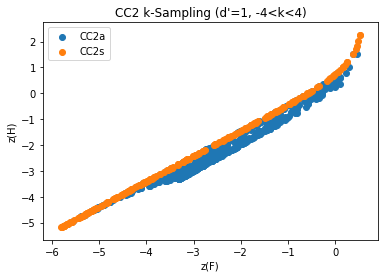

In [118]:
k_range = {'k_min': -4, 'k_max': 4, 'k_num': 1000}
zfa_vals, zha_vals = diff_model.sample_k1_k2_values_to_z(k_range, 1, 500)
zfs_vals, zhs_vals = diff_model.sample_k_values_to_z(k_range, 1, 500)

plt.scatter(zfa_vals, zha_vals, label='CC2a')
plt.scatter(zfs_vals, zhs_vals, label='CC2s')
plt.xlabel('z(F)')
plt.ylabel('z(H)')
plt.title('CC2 k-Sampling (d\'=1, -4<k<4)')
plt.legend()
#plt.savefig('results/cc2_sampling_smallk.png')

In [112]:
# CC2 k-sampling using subject slope-intercept data

k_range = {'k_min': -4, 'k_max': 4, 'k_num': 101}
dp_range = {'dp_min': 0, 'dp_max': 2, 'dp_num': 11}

mb_data = pd.read_csv('data/mb_data.csv', index_col=0)
x_vals = [-4, 3]

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    zfa_vals, zha_vals = diff_model.sample_k1_k2_values_to_z(k_range, dp, 500)
    zfs_vals, zhs_vals = diff_model.sample_k_values_to_z(k_range, dp, 500)

    plt.gcf().set_size_inches(8, 6)
    plt.scatter(zfa_vals, zha_vals, alpha=0.3, marker='^', facecolor="none", edgecolor='black', label='CC2a')
    plt.scatter(zfs_vals, zhs_vals, alpha=0.3, marker='s', facecolor="none", edgecolor='black', label='CC2s')
    for index, row in mb_data.iterrows():
        slope, intercept = row['Slope'], row['Intercept']
        pred_vals = [slope * n + intercept for n in x_vals]
        plt.plot(x_vals, pred_vals, color='black', alpha=0.1)
    plt.xlabel('z(F)')
    plt.ylabel('z(H)')
    plt.xlim(-4, 3)
    plt.ylim(-4, 3)
    plt.title(f'CC2 k-Value Sampling (d\'={round(dp,2)}, 0<k<4)')
    plt.legend()
    plt.savefig(f'results/k_sampling{round(dp,2)}.png')
    plt.clf()
    

<Figure size 576x432 with 0 Axes>

In [123]:
# CC2 k-sampling w/ subject z-value data

k_range = {'k_min': -5, 'k_max': 5, 'k_num': 201}
dp_range = {'dp_min': 0, 'dp_max': 2.5, 'dp_num': 26}

data = pd.read_csv('data/z_data.csv', index_col=0)
x_vals = [-4, 3]
explained_subs = ['LY', 'YJZ', 'HZL', 'LJJ']

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    zfa_vals, zha_vals = diff_model.sample_k1_k2_values_to_z(k_range, dp, 1000)
    zfs_vals, zhs_vals = diff_model.sample_k_values_to_z(k_range, dp, 500)

    plt.gcf().set_size_inches(8, 6)
    plt.scatter(zfa_vals, zha_vals, alpha=0.3, marker='^', facecolor="none", edgecolor='black', label='CC2a')
    plt.scatter(zfs_vals, zhs_vals, alpha=0.3, marker='s', facecolor="none", edgecolor='black', label='CC2s')

    for i in range(len(data)):
        sub_data = data.iloc[i]
        if sub_data['Subject'] in explained_subs:
            alpha = 0.3
            zf_vals = sub_data.filter(like='ZF').tolist()
            zh_vals = sub_data.filter(like='ZH').tolist()
            plt.plot(zf_vals, zh_vals, color='black', alpha=alpha)    
    
    plt.xlabel('z(F)')
    plt.ylabel('z(H)')
    plt.xlim(-4, 3)
    plt.ylim(-4, 3)
    plt.title(f'CC2 k-Value Sampling (d\'={round(dp,2)}, -4<k<4)')
    plt.legend()
    plt.savefig(f'results/k_sampling{round(dp,2)}.png')
    plt.clf()


<Figure size 576x432 with 0 Axes>

In [125]:
# CC2 k-sampling w/ subject p-value data

k_range = {'k_min': -4, 'k_max': 4, 'k_num': 201}
dp_range = {'dp_min': 0, 'dp_max': 2.5, 'dp_num': 26}

data = pd.read_csv('data/p_data.csv', index_col=0)
x_vals = [-4, 3]
explained_subs = ['LY', 'YJZ', 'HZL', 'LJJ']

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    pfa_vals, pha_vals = diff_model.sample_k1_k2_values_to_p(k_range, dp, 1000)
    pfs_vals, phs_vals = diff_model.sample_k_values_to_p(k_range, dp, 500)

    plt.gcf().set_size_inches(8, 6)
    plt.scatter(pfa_vals, pha_vals, alpha=0.3, marker='^', facecolor="none", edgecolor='black', label='CC2a')
    plt.scatter(pfs_vals, phs_vals, alpha=0.3, marker='s', facecolor="none", edgecolor='black', label='CC2s')

    for i in range(len(data)):
        sub_data = data.iloc[i]
        if sub_data['Subject'].replace('\'', "") in explained_subs:
            alpha = 0.3
            pf_vals = sub_data.filter(like='PF').tolist()
            ph_vals = sub_data.filter(like='PH').tolist()
            plt.plot(pf_vals, ph_vals, color='black', alpha=alpha)    
    
    plt.xlabel('p(F)')
    plt.ylabel('p(H)')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title(f'CC2 k-Value Sampling (d\'={round(dp,2)}, -4<k<4)')
    plt.legend()
    plt.savefig(f'results/k_sampling{round(dp,2)}.png')
    plt.clf()


<Figure size 576x432 with 0 Axes>

# Analyzing CC1 ROC Fit

In [171]:
def distance(point, coef):
    return abs((coef[0]*point[0])-point[1]+coef[1])/math.sqrt((coef[0]*coef[0])+1)

def f(B, x):
    return B[0]*x + B[1]
linear = odrpack.Model(f)

In [204]:
k_range = {'k_min': -4, 'k_max': 4, 'k_num': 201}
dp_range = {'dp_min': 0, 'dp_max': 2.5, 'dp_num': 101}

z_data = pd.read_csv('data/z_data.csv', index_col=0)
p_data = pd.read_csv('data/p_data.csv', index_col=0)
p_data['Subject'] = p_data['Subject'].str.replace('\'', '')
x_vals = [-5, 5]
explained_subs = ['LY', 'YJZ', 'HZL', 'LJJ', 'CSF','LT','ZBY','DLC','HMH','GAX','LMT','PC','SZJ','WYX','ZJ']

for i in range(len(z_data)):
    
    z_sub_data = z_data.iloc[i]
    subject = z_sub_data['Subject'].replace('\'', "")

    if subject in explained_subs:    

        # Unpack subject data
        zf_vals = [n for n in z_sub_data.filter(like='ZF').tolist() if n != 0]
        zh_vals = [n for n in z_sub_data.filter(like='ZH').tolist() if n != 0]
        pf_vals = [st.norm.cdf(z) for z in zf_vals]
        ph_vals = [st.norm.cdf(z) for z in zh_vals]

        # Find subject TLS regression line
        odr_data = odrpack.RealData(zf_vals, zh_vals)
        odr = odrpack.ODR(odr_data, linear, beta0=[1., 1.])
        subject_slope, subject_intercept = odr.run().beta
        print(f'{subject} TLS slope: {subject_slope}')
        
        # Find d' that yields closest fitting z-ROC
        lowest_tls = np.inf
        best_dp = 0
        for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
            zfm_vals, zhm_vals = diff_model.get_k_values_to_z_cc1(k_range, dp)
            
            if len(zfm_vals) < 2:
                continue
            
            coef = [subject_slope, subject_intercept]
            tls = np.sum([distance([f, h], coef) for f, h in zip(zfm_vals, zhm_vals)])

            if tls < lowest_tls:
                lowest_tls = tls
                best_dp = dp

        print(f"TLS value: {lowest_tls}")
        
        # Plot z-ROC
        plt.gcf().set_size_inches(8, 6)
        y_pred = [subject_intercept + subject_slope * n for n in x_vals]
        plt.plot(zf_vals, zh_vals, color='black', label='Human Data')
        zfm_vals, zhm_vals = diff_model.get_k_values_to_z_cc1(k_range, best_dp)
        plt.plot(x_vals, y_pred, color='black', linestyle='--', alpha=0.2, label=f'Human ROC: y={round(subject_intercept, 3)}+{round(subject_slope, 3)}x')
        plt.plot(zfm_vals, zhm_vals, color='black', alpha=0.5, label='Model ROC')

        plt.xlabel('z(F)')
        plt.ylabel('z(H)')
        plt.xlim(-4, 3)
        plt.ylim(-4, 3)
        subject_acc = round(z_sub_data['Accuracy'], 3)
        model_acc = round((st.norm.cdf(best_dp/2))**2 + (st.norm.cdf(-best_dp/2))**2, 3)
        plt.title(f'CC1 Subject {subject} ROC Fitting (d\'={round(best_dp,3)})\nSubject Accuracy: {subject_acc}    Model Accuracy: {model_acc}')
        plt.legend()
        plt.savefig(f'results/output/cc1_zmodel_{subject}.png')
        plt.clf()
        
        # Plot p-ROC
        plt.gcf().set_size_inches(8, 6)
        plt.plot(pf_vals, ph_vals, color='black', label='Human Data')
        temp_x = np.linspace(-4, 3, 26)
        y_pred = [subject_intercept + subject_slope * n for n in temp_x]
        temp_x = [st.norm.cdf(val) for val in temp_x]
        y_pred = [st.norm.cdf(val) for val in y_pred]
        plt.plot(temp_x, y_pred, color='black', linestyle='--', alpha=0.2, label='Human ROC')
        pfm_vals, phm_vals = diff_model.get_k_values_to_p_cc1(k_range, best_dp)
        plt.plot(pfm_vals, phm_vals, color='black', alpha=0.5, label='Model ROC')
        
        plt.xlabel('p(F)')
        plt.ylabel('p(H)')
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.title(f'CC1 Subject {subject} ROC Fitting (d\'={round(best_dp,3)})\nSubject Accuracy: {subject_acc}    Model Accuracy: {model_acc}')
        plt.legend()
        plt.savefig(f'results/output/cc1_pmodel_{subject}.png')
        plt.clf()


CSF TLS slope: 1.0028619619006445
TLS value: 49.35050270087704
HZL TLS slope: 0.8388150456298428
TLS value: 145.01584251228996
LJJ TLS slope: 0.821745211910352
TLS value: 163.2094742999399
LT TLS slope: 0.905964790070835
TLS value: 136.54266524856624
ZBY TLS slope: 0.8016524510555929
TLS value: 130.70580254353422
ZBY TLS slope: 1.102787790941932
TLS value: 141.67963866459507
DLC TLS slope: 1.0277976800645598
TLS value: 4.7493196912019355
GAX TLS slope: 1.1368243854933529
TLS value: 45.48847229601816
HMH TLS slope: 1.0062878358531209
TLS value: 15.401411477797062
LMT TLS slope: 1.045244291738568
TLS value: 18.792615274683875
LY TLS slope: 0.8430938818981506
TLS value: 48.237251004538194
PC TLS slope: 0.9450103493481479
TLS value: 16.876396241263766
SZJ TLS slope: 1.010588634237981
TLS value: 23.63763459144537
WYX TLS slope: 1.16648171357917
TLS value: 48.77718146839527
YJZ TLS slope: 0.9385283296600431
TLS value: 20.89767833813628
ZJ TLS slope: 1.0048930538391838
TLS value: 2.1140299203

<Figure size 576x432 with 0 Axes>